In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
X_norm=norm.fit_transform(data)
X_norm


array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

# KMeans Clusttering

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03969232820057102
0.031232108968648233
0.027180954089528406
0.023664665162120284
0.020448724450857582
0.01853787449801328


Text(0.5, 1.0, 'The Elbow Method')

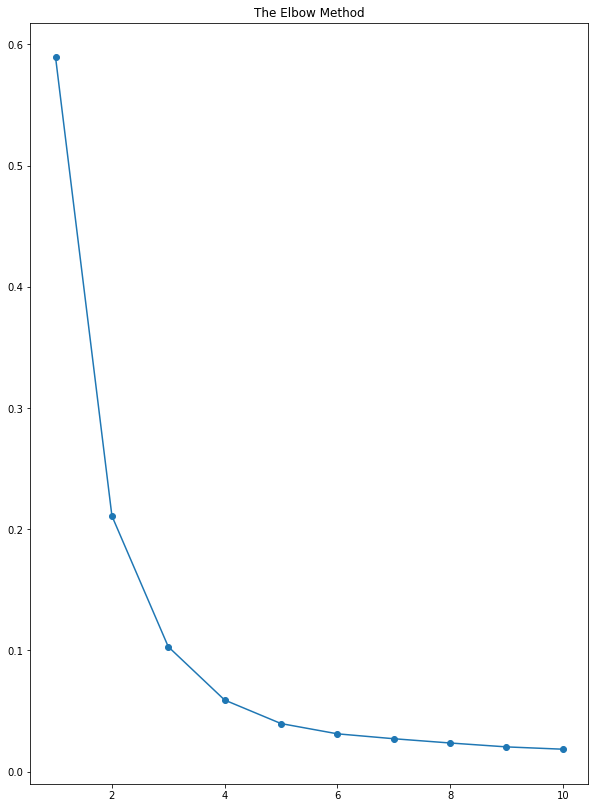

In [9]:
plt.figure(figsize=(10,14))
plt.plot(range(1,11),wcss,'-o')
plt.title("The Elbow Method")


from this we can understand that the optimum number of clusters is 3

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
clusters_kmeans=kmeans.fit_predict(X_norm)
clusters_kmeans

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
type(X_norm)

numpy.ndarray

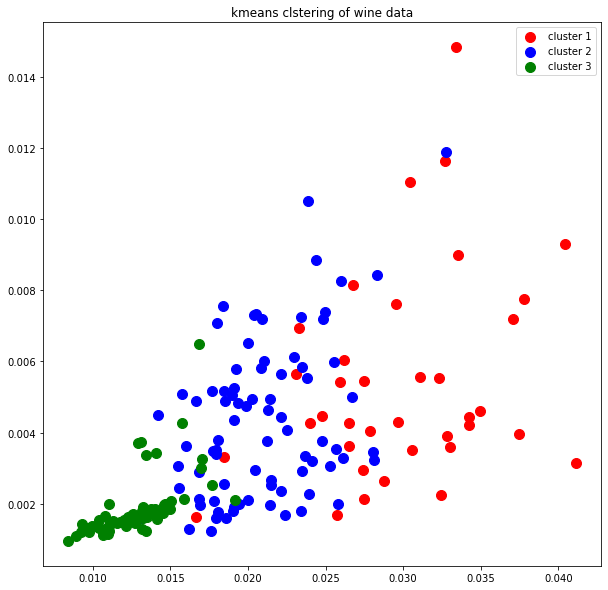

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_kmeans==0,0],X_norm[clusters_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_kmeans==1,0],X_norm[clusters_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_kmeans==2,0],X_norm[clusters_kmeans==2,1],s=100,c='green',label='cluster 3')

plt.title('kmeans clstering of wine data')

plt.legend()
plt.show()

In [13]:
result= data.copy()
result.drop(result.columns[[2,3,4,5,6,7,8]], axis = 1, inplace = True)
result["Clusters_kmeans"]=clusters_kmeans
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans
0,14.23,1.71,5.64,1.04,3.92,1065,2
1,13.20,1.78,4.38,1.05,3.40,1050,2
2,13.16,2.36,5.68,1.03,3.17,1185,2
3,14.37,1.95,7.80,0.86,3.45,1480,2
4,13.24,2.59,4.32,1.04,2.93,735,1


# HC Model

In [14]:
import scipy.cluster.hierarchy as sch

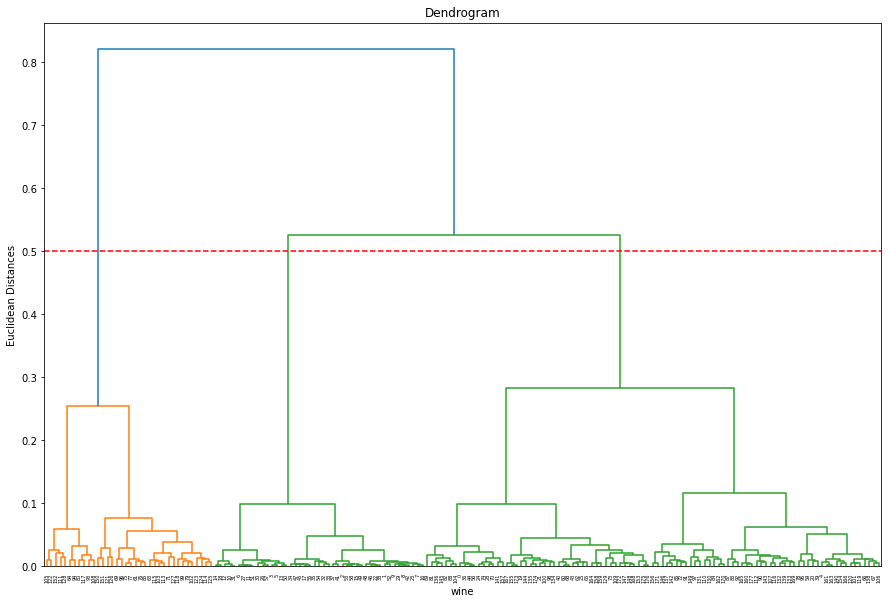

In [15]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram (sch.linkage(X_norm,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean Distances')
plt.hlines(0.5,0,5000,colors ="r",linestyles = "dashed")
plt.show()

##### optimum number of clusters is 3

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ='ward')
clusters_hc=hc.fit_predict(X_norm)

In [17]:
clusters_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

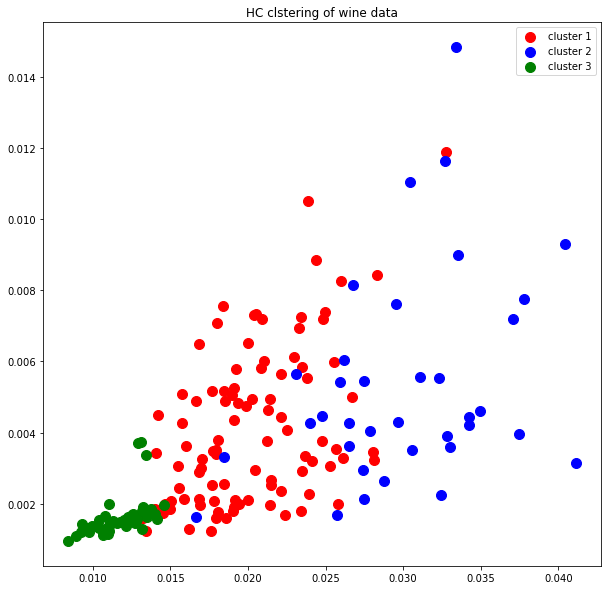

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_hc==0,0],X_norm[clusters_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_hc==1,0],X_norm[clusters_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_hc==2,0],X_norm[clusters_hc==2,1],s=100,c='green',label='cluster 3')

plt.title('HC clstering of wine data')

plt.legend()
plt.show()

In [19]:
result["clusters_hc"]=clusters_hc

In [20]:
result.head(10)

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,clusters_hc
0,14.23,1.71,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,4.38,1.05,3.40,1050,2,2
2,13.16,2.36,5.68,1.03,3.17,1185,2,2
3,14.37,1.95,7.80,0.86,3.45,1480,2,2
4,13.24,2.59,4.32,1.04,2.93,735,1,0
5,14.20,1.76,6.75,1.05,2.85,1450,2,2
6,14.39,1.87,5.25,1.02,3.58,1290,2,2
7,14.06,2.15,5.05,1.06,3.58,1295,2,2
8,14.83,1.64,5.20,1.08,2.85,1045,2,2
9,13.86,1.35,7.22,1.01,3.55,1045,2,2


# PCA

In [21]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [22]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 5)

In [23]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

# KMeans Clusttering After PCA

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1854.9554543633787
1201.1575003653556
825.0208377375332
728.2957772708611
658.8177922221248
602.152263866759
562.1724398864935
524.1843895087887
483.827204765008
449.92907548596406


Text(0.5, 1.0, 'The Elbow Method')

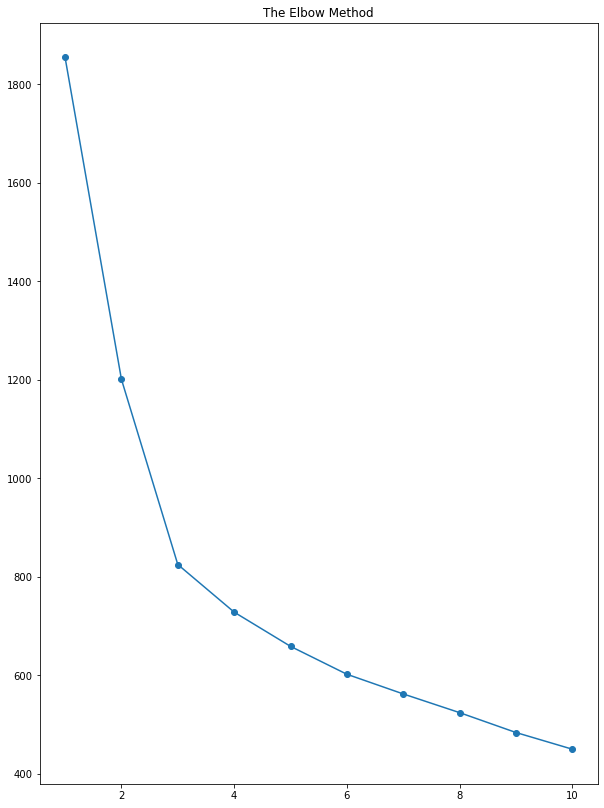

In [25]:
plt.figure(figsize=(10,14))
plt.plot(range(1,11),wcss,'-o')
plt.title("The Elbow Method")


In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42,)
clusters_kmean_pca=kmeans.fit_predict(x_pca)


In [27]:
type(x_pca)
clusters_kmean_pca

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 4, 3, 4, 2, 3, 2, 3, 2, 4, 2, 2, 3, 0, 2, 2, 3, 4,
       3, 3, 3, 3, 3, 2, 2, 1, 4, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 4,
       2, 2, 4, 3, 3, 3, 2, 2, 3, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

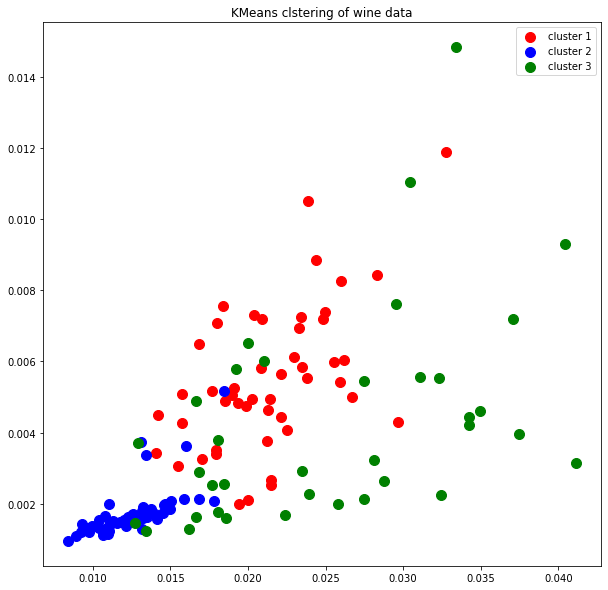

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_kmean_pca==0,0],X_norm[clusters_kmean_pca==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_kmean_pca==1,0],X_norm[clusters_kmean_pca==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_kmean_pca==2,0],X_norm[clusters_kmean_pca==2,1],s=100,c='green',label='cluster 3')

plt.title('KMeans clstering of wine data')

plt.legend()
plt.show()

In [28]:
result["clusters_kmeans_pca"]=clusters_kmean_pca

In [29]:
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,clusters_hc,clusters_kmeans_pca
0,14.23,1.71,5.64,1.04,3.92,1065,2,0,1
1,13.20,1.78,4.38,1.05,3.40,1050,2,2,1
2,13.16,2.36,5.68,1.03,3.17,1185,2,2,1
3,14.37,1.95,7.80,0.86,3.45,1480,2,2,1
4,13.24,2.59,4.32,1.04,2.93,735,1,0,4


# HC model Clusttering after PCA

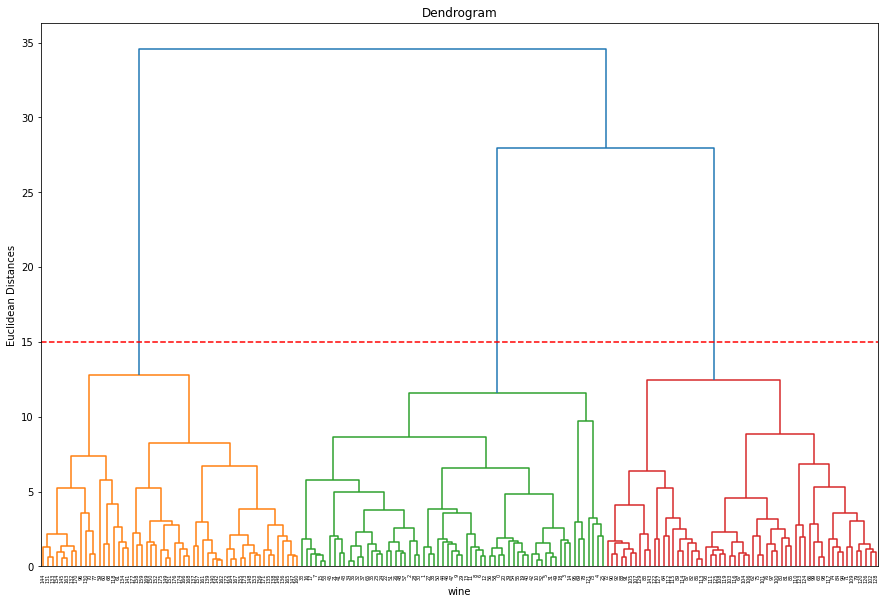

In [30]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram (sch.linkage(x_pca,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean Distances')
plt.hlines(15,0,5000,colors ="r",linestyles = "dashed")
plt.show()

optimum number of cluster is 3

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ='ward')
clusters_hc_pca=hc.fit_predict(x_pca)

In [32]:
clusters_hc_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

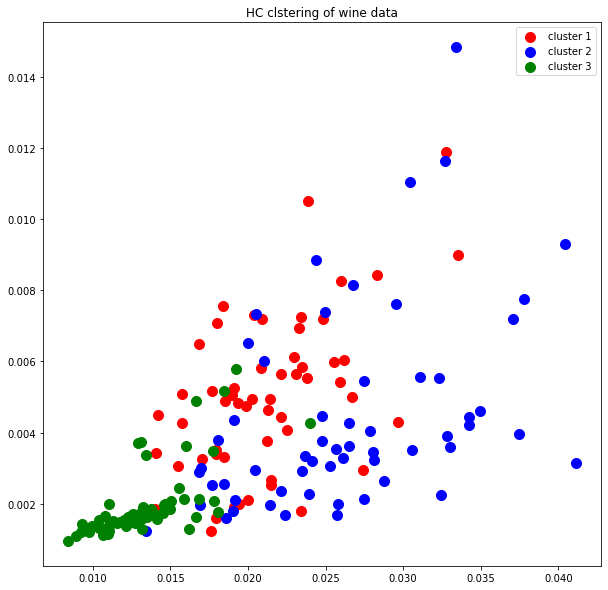

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_hc_pca==0,0],X_norm[clusters_hc_pca==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_hc_pca==1,0],X_norm[clusters_hc_pca==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_hc_pca==2,0],X_norm[clusters_hc_pca==2,1],s=100,c='green',label='cluster 3')

plt.title('HC clstering of wine data')

plt.legend()
plt.show()

In [34]:
result["clusters_hc_pca"]=clusters_hc_pca

In [35]:
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,clusters_hc,clusters_kmeans_pca,clusters_hc_pca
0,14.23,1.71,5.64,1.04,3.92,1065,2,0,1,2
1,13.20,1.78,4.38,1.05,3.40,1050,2,2,1,2
2,13.16,2.36,5.68,1.03,3.17,1185,2,2,1,2
3,14.37,1.95,7.80,0.86,3.45,1480,2,2,1,2
4,13.24,2.59,4.32,1.04,2.93,735,1,0,4,2


In [36]:
result["clusters_hc_pca"].value_counts()

2    65
1    58
0    55
Name: clusters_hc_pca, dtype: int64

In [37]:
result["clusters_hc"].value_counts()

0    97
2    45
1    36
Name: clusters_hc, dtype: int64

#### Found the optimum number of clusters in each model and created the model with the optimum number of clusters.